# Maths - Form & Function: Chapter 4 (Real Numbers)

## 1. Measures of Magnitude

> It is a familiar but remarkable fact that one single scale of numbers will be applicable to each of many types of quantitative comparisons: To distance, to weight, to length, to width, to temperature, to time, to height, and so on. Once a unit is chosen, each of these magnitudes exemplifies one and the same scale: That of real numbers, considered as a scale laid out as the points of a line with chosen origin and unit point; and so emphasizing the interpretation of the scale by distances . . .

## 2. Magnitudes as a Geometric Measure

> Many comparisons or measurements of various magnitudes can be reduced to the single scale provided by the real numbers. And in those cases where a single real number does not suffice to measure a magnitude, it is often fitting to use several such numbers - as when the size of a plane figure is given by its width and its height, or of a solid figure by width, height, and depth.

In [47]:
import math

def divisionsOfRightAngle(divisor):
    """ Divide the right angle by the divisor. """
    if divisor > 0:
        return math.pi / 2**divisor

print("Full angle      : " + str(2 * math.pi))
print("Straight angle  : " + str(math.pi))
print("Right angle     : " + str(math.pi / 2))
print("Right angle / 2 : " + str(divisionsOfRightAngle(2)))
print("Right angle / 3 : " + str(divisionsOfRightAngle(3)))
print("Right angle / 4 : " + str(divisionsOfRightAngle(4)))

Full angle      : 6.283185307179586
Straight angle  : 3.141592653589793
Right angle     : 1.5707963267948966
Right angle / 2 : 0.7853981633974483
Right angle / 3 : 0.39269908169872414
Right angle / 4 : 0.19634954084936207


In [24]:
def realNumberAsAngleModulo(t):
    """ Shows real numbers as modulo of full angle. """
    fullAngle = (2 * math.pi)
    t0 = t % fullAngle
    k = t // fullAngle
    return "t = " + str(t0) + " + 2π" + str(int(k))

print(realNumberAsAngleModulo(4))
print(realNumberAsAngleModulo(8))
print(realNumberAsAngleModulo(16))

t = 4.0 + 2π0
t = 1.7168146928204138 + 2π1
t = 3.4336293856408275 + 2π2


## 3. Maniulations of Magnitudes

> The "practical" operations of addition and multiplication on various types of magnitudes lead to the algebraic operations of sum and product for the real numbers on the linear scaled. The various rules for these manipulations of numbers were well known before they were codified by axioms.

The codification of rules for the manipulation of numbers:

> The real numbers form an abelian group under addition, under addition and multiplication they form a commutative ring, moreover, one which is a field.

- abelian group: the group operation does not depend on order of elements being written.
- commutative ring: an abelian group under addition with associative and commutative binary operations of multiplication with a unit in which both distributative laws holds.
- associative: brackets around different pairs of elements with >1 uses of the operator don't change the result
- commutative: the order of elements around the operator don't change the results
- field: a set on which addition, multiplication, subtraction & division are defined (eg. sets or rational & real numbers)

In [26]:
def distributativeLawsMultiplication(a, b, c):
    """ Tests equality of the 2 distributative laws. """
    law1 = a * (b + c) == a * b + a * c
    law2 = (b + c) * a == b * a + c * a
    return law1 == law2

print(distributativeLawsMultiplication(1, 2, 3))
print(distributativeLawsMultiplication(2, 3, 4))
print(distributativeLawsMultiplication(-2, 3, -4))

True
True
True


- Group: a set with an operation
    - Ring: a Group with 2nd associative operation & where distributative properties make the operations compatible
        - Field: a Ring where the 2nd operation satisfies all group properties (except additive identity)

## 4. Comparison of Magnitudes

In [2]:
def orderedFieldProperties(a, b, c):
    """ Checks that the properties of an ordered field are valid. """
    
    def property1(a, b, c):
        if a < b:
            return a + c < b + c
        else:
            return False
        
    def property2(a, b, c):
        if a < b and 0 < c:
            return a * c < b * c
        else:
            return False
        
    return property1(a, b, c) and property2(a, b, c)

print(orderedFieldProperties(1, 2, 3))
print(orderedFieldProperties(1, 2, -3))

True
False


In [9]:
def absValueMultiplication(a, b):
    """ Defines the rules for multiplication of absolute values. """
    return abs(a * b) == abs(a) * abs(b)
    
print(absValueMultiplication(2, 3))
print(absValueMultiplication(-2, 3))
print(absValueMultiplication(2, -3))
print(absValueMultiplication(-2, -3))

True
True
True
True


In [18]:
def absValueAddition(a, b):
    """ Defines the rules for addition of absolute values. """
    return abs(a + b) <= abs(a) + abs(b)

print(absValueAddition(2, 3))
print(absValueAddition(-2, 3))
print(absValueAddition(2, -3))
print(absValueAddition(-2, -3))

True
True
True
True


In [21]:
def nearness(a, b):
    """ Defines nearness through absolute values. """
    return abs(a - b)

print(nearness(2, 3))
print(nearness(-2, 3))
print(nearness(2, -3))
print(nearness(-2, -3))

1
5
5
1


**Archimedean Law**  
If a and b are positive, then there is a natural number n such that na > b

> Each real number can be approximated - to any degree of accuracy = by a rational number. This amounts to saying that there is a rational between any two reals.

**Theorem**  
If 0 < b < c, there is a rational m/n with: b < m/n < c

In [145]:
def rationalBetweenRealsProof(b, c, m, n):
    if not isinstance(m, int) or not isinstance(n, int):
        raise TypeError()
    else:
        diff = c - b
        if diff > 0:
            if n * diff > 1 and c > b + 1 / n:
                if m * 1 > n * b and b < (m/n):
                    return m - 1 <= n * b and m / n <= b + (1/n) and m / n < c
                

print(rationalBetweenRealsProof(.25, .75, 2, 4))

True


**Definition**  
The sequence $a_n$ of real numbers has the real number $b$ as a limit if and only if to each real $\epsilon > 0$ there exists a natural number $k$ with the property: if $n > k$, then $|a_n - b| < \epsilon$

In [27]:
from functools import reduce
from math import factorial

def binomialTheorem(x, m):
    """ Tests calculation of the binomial theorem. """
    if isinstance(m, int) and m > 0:
        limit = m
        result = 1
        for i in range(1, limit):
            lst = [m - x for x in range(0, i)]
            numerator = reduce((lambda x, y: x * y), lst)
            denominator = factorial(i)
            result += (numerator / denominator) * (x ** i)
        result += x**m
    return ((1 + x) ** m) == result
            
print(binomialTheorem(1, 5))

True


In [63]:
# The following is for demonstration purposes
# For true infinite series 't' would be an infinitesimal
def limitedExpansionOf2PowerSeries(a, b, t):
    """ Prints outputs of multiplied power series up to the length of a. """
    limit = len(a)
    result = 0
    for k in range(0, limit):
        subResult = 0
        for l in range(0, k):
            subResult += a[l] * b[k-l]
        result += subResult * (t ** k)
        print(result)
        
a = [.2, .3, .4, .5, .6, .7, .8]
b = [.15, .2, .25, .3, .35, .4, .45]

t = .01
limitedExpansionOf2PowerSeries(a, b, t)
print(t ** -1)

0.0
0.0004000000000000001
0.00041100000000000007
0.0004112150000000001
0.0004112186000000001
0.00041121865500000007
0.0004112186557900001
100.0


## 5. Axioms for the Reals

There are multiple forms of the completeness axiom, demonstrating that the field of **R** is complete & has no gaps:

- Completeness Axiom
- Dedekind Cut Axiom
- Caunch Condition
- Weierstrass Condition

The Completeness Axiom is defined as:

> Every non-empty set of reals with an upper bound has a least upper bound

## 6. Arithmetic Construction of the Reals

There are different possible constructions of the reals through the use of arithmetic & sets

### Dedekind Cut

This method defines a real number as a lower set divided by a cut in the field of rational numbers **Q**.
A real number is then defined as the lower set.

### Cauchy Sequences

This method defines equivalence classes of Cauchy sequences that converge to the same limit as being real numbers.

### Alternative Methods

There are other methods such as "non-standard" reals that contain both standard reals & actual infinitesimals.
Plus also fields of real numbers which are explicity "constructible".

## 7. Vector Geometry

In [45]:
def formal_properties_reals_vectors(r, s, v, w):
    """ Checks the formal properties of reals & vectors.
    Params:
    r, s : real number scalars
    v, w : vector lengths
    
    Returns:
    A truth value
    """
    a = r * (v + w) == r * v + r * w
    b = 1 * v == v
    c = (r + s) * v == r * v + s * v
    d = (r * s) * v == r * (s * v)
    return all([a, b, c, d])

print(formal_properties_reals_vectors(1, 2, 3, 4))
print(formal_properties_reals_vectors(-1, -2, -3, -4))

True
True


> A first theorem of vector geometry (= linear algebra) states that any two (finite) bases for a given vector space must have the same number of elements. This number *n* is the *dimension* of the space.

## 8. Analytic Geometry

> Geometry and coordinates arise first in dimensions 2 and 3. The need for higher dimensional geometry is motivated by phenomena which need specification of more than three coordinates: Events in space-time need four (position and time); in dynamics, the inital conditions for a particle need six, three for position and three for velocity.

> Much of mathematical physics deals with phenomena in three dimensions and so often requires a formulation in triads of equations, one for each coordinate in **R**$^3$. When **R**$^3$ is regarded as a vector space, many of these equations can be written as single vector equations. This accounts for the popularity of vector analysis in Physics.

## 9. Trigonometry

> Trigonometry is essentially a procedure for turning angular measures into linear measures

In [13]:
import math

def cos_sin_squared_identity(theta):
    """ Defines the identity of cos & sin as coordinates. """
    theta = math.radians(theta)
    identity = math.cos(theta)**2 + math.sin(theta)**2
    return identity == 1

print(cos_sin_squared_identity(45))
print(cos_sin_squared_identity(90))
print(cos_sin_squared_identity(180))
print(cos_sin_squared_identity(360))

True
True
True
True


In [25]:
# cos gives an x coordinate, sin gives a y coordinate
theta = 25
print("x = " + str(math.cos(math.radians(theta))))
print("y = " + str(math.sin(math.radians(theta))))

x = 0.9063077870366499
y = 0.42261826174069944


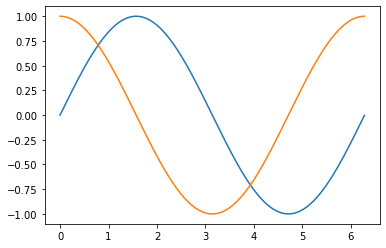

In [41]:
# Plot cos & sin
import matplotlib.pyplot as plt
import numpy as np

x = list(np.arange(0, 2 * math.pi, .01))
cos_line = list(map(math.cos, x))
sin_line = list(map(math.sin, x))

plt.plot(x, sin_line)
plt.plot(x, cos_line)
plt.show()

> . . . there are really two legally different functions: The Sine of a *number*, here with capital S, and the sine of an angle, with lower case s. This pedantic (but real!) difference is usually ignored.

In [56]:
def check_sin(theta):
    """ Checks sin with / without wrapping function. """
    wrapped = math.sin(theta + (2*math.pi))
    unwrapped = math.sin(theta)
    is_close = math.isclose(wrapped, unwrapped)
    return is_close

print(check_sin(45))
print(check_sin(90))

True
True


In [57]:
def check_cos(theta):
    """ Checks sin with / without wrapping function. """
    wrapped = math.cos(theta + (2*math.pi))
    unwrapped = math.cos(theta)
    is_close = math.isclose(wrapped, unwrapped)
    return is_close

print(check_cos(45))
print(check_cos(90))

True
True


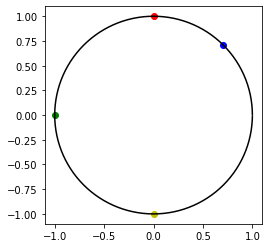

In [80]:
def trigonometric_coords(x, y, theta):
    """ Returns the coordinates for trigonometry. """
    theta = math.radians(theta)
    x_prime = x * math.cos(theta) - y * math.sin(theta)
    y_prime = x * math.sin(theta) + y * math.cos(theta)
    return x_prime, y_prime

coords_1 = trigonometric_coords(1, 0, 45)
coords_2 = trigonometric_coords(1, 0, 90)
coords_3 = trigonometric_coords(1, 0, 180)
coords_4 = trigonometric_coords(1, 0, 270)

circle = [trigonometric_coords(1, 0, y) for y in list(range(0, 360))]
circle_x = [x for x, _ in circle]
circle_y = [y for _, y in circle]

plt.plot(*coords_1, 'bo')
plt.plot(*coords_2, 'ro')
plt.plot(*coords_3, 'go')
plt.plot(*coords_4, 'yo')
plt.plot(circle_x, circle_y, 'black')
plt.gca().set_aspect('equal', adjustable = 'box')
plt.show()

In [81]:
def trigonometric_addition_cos(phi, theta):
    """ Checks trigonometric addition for cos. """
    lhs = math.cos(phi + theta)
    rhs = math.cos(phi) * math.cos(theta) - math.sin(phi) * math.sin(theta)
    return math.isclose(lhs, rhs)

trigonometric_addition_cos(45, 90)

True

In [83]:
def trigonometric_addition_sin(phi, theta):
    """ Checks trigonometric addition for sin. """
    lhs = math.sin(phi + theta)
    rhs = math.cos(phi) * math.sin(theta) + math.sin(phi) * math.cos(theta)
    return math.isclose(lhs, rhs)

trigonometric_addition_sin(45, 90)

True

In [123]:
def inner_product(x, y):
    """ Returns the inner product of 2 vectors. """
    x1, y1 = x
    x2, y2 = y
    return (x1 * x2) + (y1 * y2)

a = (1, 2)
b = (1, 1)
print("Inner product is " + str(inner_product(a, b)))

Inner product is 3


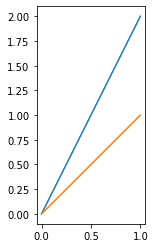

In [126]:
a1, a2 = a
b1, b2 = b

plt.plot((0, a1), (0, a2))
plt.plot((0, b1), (0, b2))
plt.gca().set_aspect('equal', adjustable = 'box')
plt.show()

## 10. Complex Numbers